In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]

In [3]:
x_train = pd.read_excel("x_train.xlsx", names = column)
x_test = pd.read_excel("x_test.xlsx", names = column)
y_train = pd.read_excel("y_train.xlsx", names = ["activity"]) -1
y_test = pd.read_excel("y_test.xlsx", names = ["activity"]) -1

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


# GYROSCOPE

### knn

In [10]:
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

In [11]:
for var_name in x_train_copy.columns:
    if 'Acc' in var_name:
        del x_train_copy[var_name]

In [12]:
for var_name in x_test_copy.columns:
    if 'Acc' in var_name:
        del x_test_copy[var_name]

In [89]:
knn = KNeighborsClassifier()
knn.fit(x_train_copy, y_train.values.ravel())

KNeighborsClassifier()

In [71]:
y_pred = knn.predict(x_test_copy)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.84      0.77       496
           1       0.86      0.75      0.80       471
           2       0.76      0.71      0.74       420
           3       0.82      0.75      0.78       491
           4       0.79      0.89      0.84       531
           5       1.00      0.95      0.97       537

    accuracy                           0.82      2946
   macro avg       0.82      0.81      0.82      2946
weighted avg       0.83      0.82      0.82      2946



In [17]:
print(confusion_matrix(y_test, y_pred))

[[417  15  64   0   0   0]
 [ 90 352  29   0   0   0]
 [ 86  35 299   0   0   0]
 [  0   2   0 368 121   0]
 [  1   3   1  55 471   0]
 [  0   1   0  24   2 510]]


In [18]:
cm = confusion_matrix(y_test, y_pred)

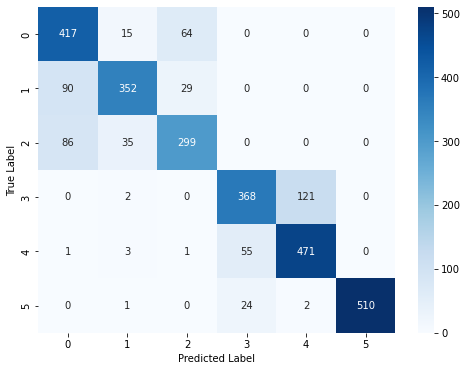

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

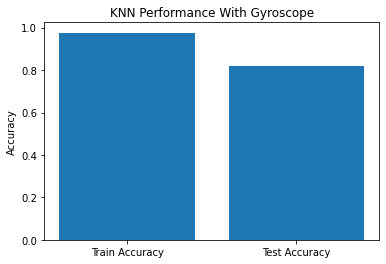

In [90]:
train_accuracy = knn.score(x_train_copy, y_train.values.ravel())
test_accuracy = knn.score(x_test_copy, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("KNN Performance With Gyroscope")
plt.show()

### random forest

In [22]:
rfc = RandomForestClassifier()
rfc.fit(x_train_copy, y_train.values.ravel())

RandomForestClassifier()

In [25]:
y_pred_rf = rfc.predict(x_test_copy)

In [26]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       496
           1       0.89      0.94      0.92       471
           2       0.81      0.81      0.81       420
           3       0.97      0.88      0.92       491
           4       0.90      0.97      0.93       531
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946



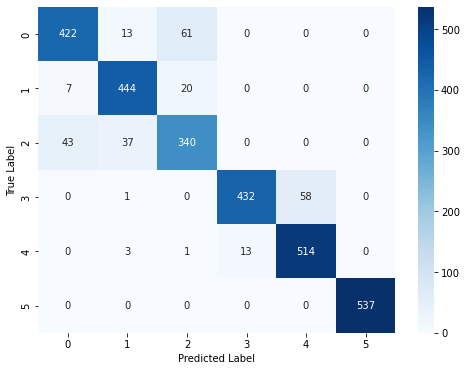

In [27]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

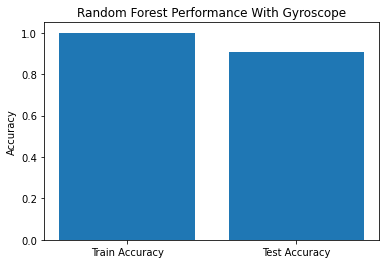

In [93]:
train_accuracy = rfc.score(x_train_copy, y_train.values.ravel())
test_accuracy = rfc.score(x_test_copy, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("Random Forest Performance With Gyroscope")
plt.show()

### xgboost


In [83]:
model = XGBClassifier()
model.fit(x_train_copy, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [30]:
y_pred_xgb = model.predict(x_test_copy)

In [31]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       496
           1       0.84      0.90      0.87       471
           2       0.81      0.83      0.82       420
           3       0.94      0.86      0.90       491
           4       0.88      0.94      0.91       531
           5       1.00      1.00      1.00       537

    accuracy                           0.90      2946
   macro avg       0.90      0.89      0.89      2946
weighted avg       0.90      0.90      0.90      2946



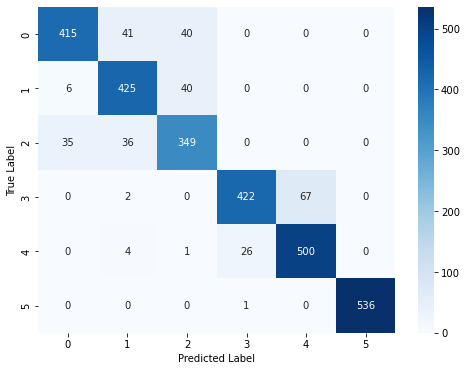

In [32]:
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

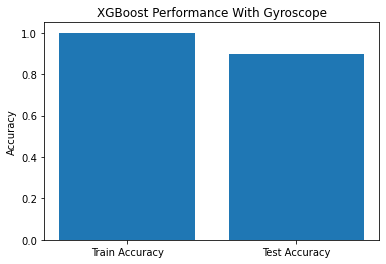

In [95]:
train_accuracy = model.score(x_train_copy, y_train.values.ravel())
test_accuracy = model.score(x_test_copy, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("XGBoost Performance With Gyroscope")
plt.show()

###  svm

In [96]:
svc = SVC()
svc.fit(x_train_copy, y_train.values.ravel())


SVC()

In [36]:
y_pred_svc = svc.predict(x_test_copy)

In [37]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       496
           1       0.94      0.94      0.94       471
           2       0.83      0.83      0.83       420
           3       0.92      0.88      0.90       491
           4       0.90      0.92      0.91       531
           5       1.00      1.00      1.00       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946



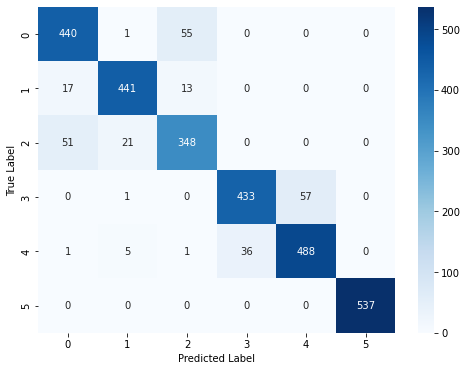

In [38]:
cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

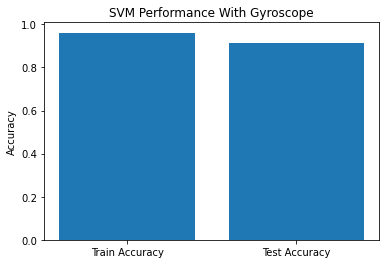

In [97]:
train_accuracy = svc.score(x_train_copy, y_train.values.ravel())
test_accuracy = svc.score(x_test_copy, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("SVM Performance With Gyroscope")
plt.show()

### yapay sinir aglari

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [106]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train_copy.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_copy, y_train, batch_size = 32, epochs= 150,validation_data = (x_test_copy,y_test))

Epoch 1/150
230/230 [==============================] - 3s 7ms/step - loss: 1.3018 - accuracy: 0.4420 - val_loss: 1.0349 - val_accuracy: 0.6327
Epoch 2/150
230/230 [==============================] - 1s 4ms/step - loss: 0.9037 - accuracy: 0.6628 - val_loss: 0.7597 - val_accuracy: 0.7800
Epoch 3/150
230/230 [==============================] - 1s 5ms/step - loss: 0.6621 - accuracy: 0.7730 - val_loss: 0.5712 - val_accuracy: 0.8276
Epoch 4/150
230/230 [==============================] - 2s 7ms/step - loss: 0.5115 - accuracy: 0.8320 - val_loss: 0.4643 - val_accuracy: 0.8534
Epoch 5/150
230/230 [==============================] - 1s 5ms/step - loss: 0.4296 - accuracy: 0.8542 - val_loss: 0.4190 - val_accuracy: 0.8568
Epoch 6/150
230/230 [==============================] - 1s 4ms/step - loss: 0.3732 - accuracy: 0.8704 - val_loss: 0.4081 - val_accuracy: 0.8415
Epoch 7/150
230/230 [==============================] - 1s 4ms/step - loss: 0.3380 - accuracy: 0.8819 - val_loss: 0.3610 - val_accuracy: 0.8673

Epoch 58/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0867 - accuracy: 0.9669 - val_loss: 0.3017 - val_accuracy: 0.8934
Epoch 59/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0824 - accuracy: 0.9699 - val_loss: 0.2875 - val_accuracy: 0.9019
Epoch 60/150
230/230 [==============================] - 1s 3ms/step - loss: 0.0816 - accuracy: 0.9679 - val_loss: 0.3324 - val_accuracy: 0.8893
Epoch 61/150
230/230 [==============================] - 1s 3ms/step - loss: 0.0797 - accuracy: 0.9703 - val_loss: 0.2752 - val_accuracy: 0.9033
Epoch 62/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0808 - accuracy: 0.9709 - val_loss: 0.2692 - val_accuracy: 0.9114
Epoch 63/150
230/230 [==============================] - 1s 3ms/step - loss: 0.0765 - accuracy: 0.9710 - val_loss: 0.2904 - val_accuracy: 0.8995
Epoch 64/150
230/230 [==============================] - 1s 3ms/step - loss: 0.0783 - accuracy: 0.9698 - val_loss: 0.3016 - val_accuracy:

Epoch 115/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9849 - val_loss: 0.3358 - val_accuracy: 0.9111
Epoch 116/150
230/230 [==============================] - 1s 5ms/step - loss: 0.0461 - accuracy: 0.9819 - val_loss: 0.3382 - val_accuracy: 0.9084
Epoch 117/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0416 - accuracy: 0.9849 - val_loss: 0.3533 - val_accuracy: 0.9039
Epoch 118/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0444 - accuracy: 0.9827 - val_loss: 0.3707 - val_accuracy: 0.9016
Epoch 119/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0431 - accuracy: 0.9838 - val_loss: 0.3460 - val_accuracy: 0.9084
Epoch 120/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0461 - accuracy: 0.9839 - val_loss: 0.3575 - val_accuracy: 0.9036
Epoch 121/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0441 - accuracy: 0.9834 - val_loss: 0.3634 - val_ac

In [107]:
_, accuracy = model.evaluate(x_test_copy,y_test)


93/93 [==============================] - 0s 3ms/step - loss: 0.3745 - accuracy: 0.9104


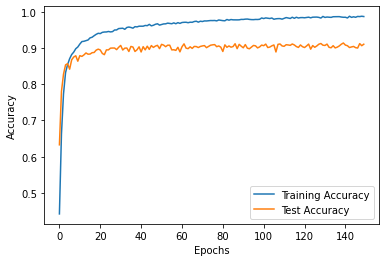

In [109]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [108]:
# Test verileri üzerinde tahminlerin hesaplanması
y_pred = model.predict(x_test_copy)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix'in hesaplanması
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

93/93 [==============================] - 0s 2ms/step
[[414   4  78   0   0   0]
 [ 10 454   7   0   0   0]
 [ 52  17 351   0   0   0]
 [  0   2   0 422  67   0]
 [  2   0   1  16 511   1]
 [  0   0   0   0   7 530]]


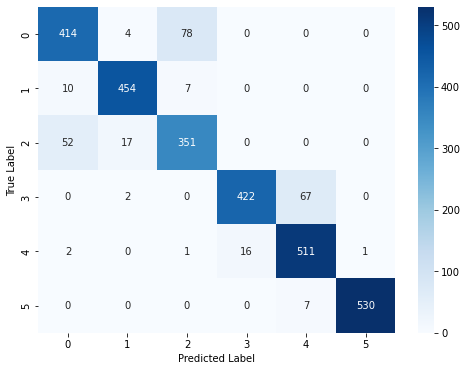

In [110]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [111]:
class_report = classification_report(y_test, y_pred_classes)
print(class_report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       496
           1       0.95      0.96      0.96       471
           2       0.80      0.84      0.82       420
           3       0.96      0.86      0.91       491
           4       0.87      0.96      0.92       531
           5       1.00      0.99      0.99       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946



# accelerometer

In [44]:
x_train_copy_2 = x_train.copy()
x_test_copy_2 = x_test.copy()

In [45]:
for var_name in x_train_copy_2.columns:
    if 'Gyro' in var_name:
        del x_train_copy_2[var_name]

In [46]:
for var_name in x_test_copy_2.columns:
    if 'Gyro' in var_name:
        del x_test_copy_2[var_name]

###  KNN

In [91]:
knn = KNeighborsClassifier()
knn.fit(x_train_copy_2, y_train.values.ravel())

KNeighborsClassifier()

In [76]:
y_pred_knn_acc = knn.predict(x_test_copy_2)


In [50]:
print(classification_report(y_test, y_pred_knn_acc))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       496
           1       0.86      0.84      0.85       471
           2       0.95      0.79      0.86       420
           3       0.83      0.66      0.73       491
           4       0.74      0.88      0.80       531
           5       1.00      0.99      1.00       537

    accuracy                           0.86      2946
   macro avg       0.87      0.86      0.86      2946
weighted avg       0.87      0.86      0.86      2946



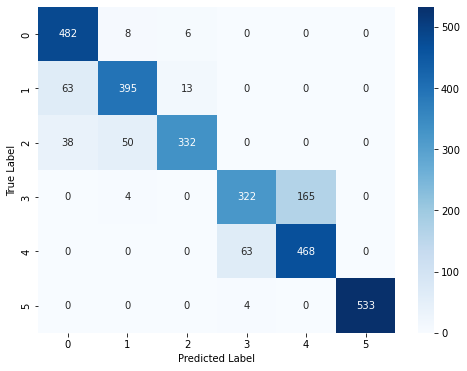

In [51]:
cm = confusion_matrix(y_test, y_pred_knn_acc)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

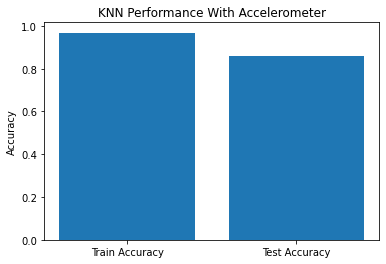

In [92]:
train_accuracy = knn.score(x_train_copy_2, y_train.values.ravel())
test_accuracy = knn.score(x_test_copy_2, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("KNN Performance With Accelerometer")
plt.show()

### random forest

In [79]:
rfc2 = RandomForestClassifier()
rfc2.fit(x_train_copy_2, y_train.values.ravel())

RandomForestClassifier()

In [80]:
y_pred_rf2 = rfc2.predict(x_test_copy_2)

In [56]:
print(classification_report(y_test, y_pred_rf2))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       496
           1       0.88      0.86      0.87       471
           2       0.95      0.84      0.89       420
           3       0.81      0.81      0.81       491
           4       0.82      0.83      0.83       531
           5       1.00      1.00      1.00       537

    accuracy                           0.88      2946
   macro avg       0.89      0.88      0.88      2946
weighted avg       0.89      0.88      0.88      2946



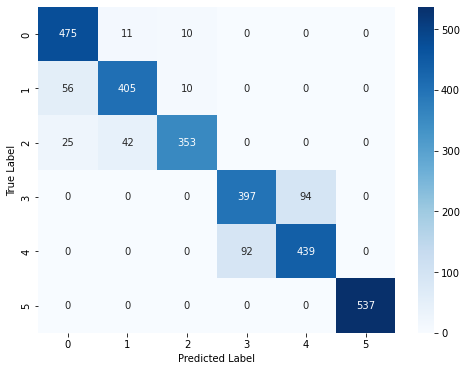

In [57]:
cm = confusion_matrix(y_test, y_pred_rf2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

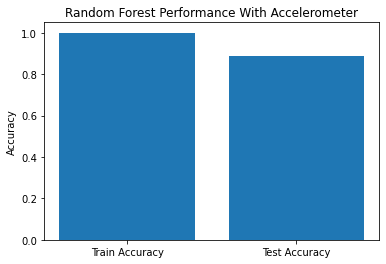

In [94]:
train_accuracy = rfc2.score(x_train_copy_2, y_train.values.ravel())
test_accuracy = rfc2.score(x_test_copy_2, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("Random Forest Performance With Accelerometer")
plt.show()

### xgboost

In [58]:
model2 = XGBClassifier()
model2.fit(x_train_copy_2, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [59]:
y_pred_xgb2 = model2.predict(x_test_copy_2)

In [60]:
print(classification_report(y_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       496
           1       0.87      0.89      0.88       471
           2       0.98      0.89      0.93       420
           3       0.82      0.80      0.81       491
           4       0.82      0.83      0.83       531
           5       1.00      1.00      1.00       537

    accuracy                           0.89      2946
   macro avg       0.90      0.89      0.89      2946
weighted avg       0.89      0.89      0.89      2946



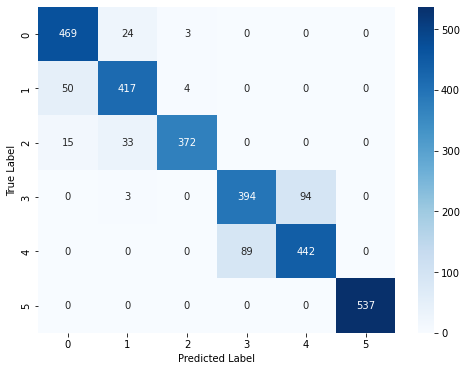

In [61]:
cm = confusion_matrix(y_test, y_pred_xgb2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

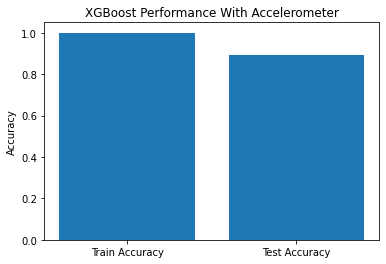

In [88]:
train_accuracy = model2.score(x_train_copy_2, y_train.values.ravel())
test_accuracy = model2.score(x_test_copy_2, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("XGBoost Performance With Accelerometer")
plt.show()

### svc

In [62]:
svc2 = SVC()
svc2.fit(x_train_copy_2, y_train.values.ravel())


SVC()

In [63]:
y_pred_svc2 = svc2.predict(x_test_copy_2)

In [64]:
print(classification_report(y_test, y_pred_svc2))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       496
           1       0.90      0.90      0.90       471
           2       0.98      0.90      0.94       420
           3       0.86      0.77      0.81       491
           4       0.81      0.88      0.84       531
           5       1.00      1.00      1.00       537

    accuracy                           0.90      2946
   macro avg       0.91      0.90      0.90      2946
weighted avg       0.91      0.90      0.90      2946



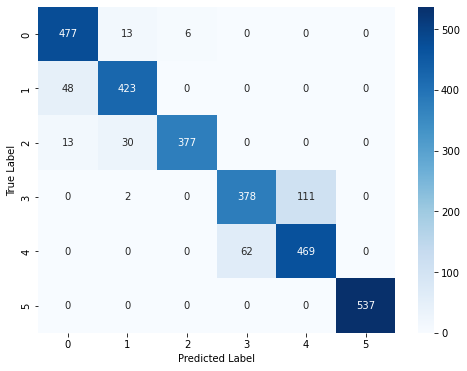

In [65]:
cm = confusion_matrix(y_test, y_pred_svc2)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

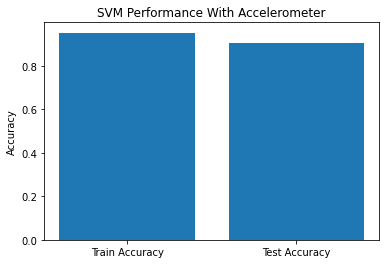

In [98]:
train_accuracy = svc2.score(x_train_copy_2, y_train.values.ravel())
test_accuracy = svc2.score(x_test_copy_2, y_test.values.ravel())

# Eğitim ve test başarılarını grafik olarak çizdirme
accuracies = [train_accuracy, test_accuracy]
plt.bar(["Train Accuracy", "Test Accuracy"], accuracies)
plt.ylabel("Accuracy")
plt.title("SVM Performance With Accelerometer")
plt.show()

In [112]:
model = Sequential()
model.add(Dense(units=64,kernel_initializer='normal',activation='sigmoid',input_dim=x_train_copy_2.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(units=6,kernel_initializer='normal',activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train_copy_2, y_train, batch_size = 32, epochs= 150,validation_data = (x_test_copy_2,y_test))

Epoch 1/150
230/230 [==============================] - 3s 9ms/step - loss: 1.0750 - accuracy: 0.6369 - val_loss: 0.6938 - val_accuracy: 0.7712
Epoch 2/150
230/230 [==============================] - 2s 8ms/step - loss: 0.5215 - accuracy: 0.8452 - val_loss: 0.4488 - val_accuracy: 0.8534
Epoch 3/150
230/230 [==============================] - 1s 5ms/step - loss: 0.3566 - accuracy: 0.8823 - val_loss: 0.3379 - val_accuracy: 0.8717
Epoch 4/150
230/230 [==============================] - 2s 7ms/step - loss: 0.2847 - accuracy: 0.8988 - val_loss: 0.3462 - val_accuracy: 0.8561
Epoch 5/150
230/230 [==============================] - 2s 7ms/step - loss: 0.2451 - accuracy: 0.9113 - val_loss: 0.2739 - val_accuracy: 0.8958
Epoch 6/150
230/230 [==============================] - 1s 5ms/step - loss: 0.2182 - accuracy: 0.9166 - val_loss: 0.2729 - val_accuracy: 0.8924
Epoch 7/150
230/230 [==============================] - 1s 6ms/step - loss: 0.1994 - accuracy: 0.9256 - val_loss: 0.2826 - val_accuracy: 0.8887

Epoch 58/150
230/230 [==============================] - 1s 5ms/step - loss: 0.0802 - accuracy: 0.9664 - val_loss: 0.3206 - val_accuracy: 0.9046
Epoch 59/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9652 - val_loss: 0.3452 - val_accuracy: 0.8955
Epoch 60/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0822 - accuracy: 0.9661 - val_loss: 0.2866 - val_accuracy: 0.9070
Epoch 61/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0787 - accuracy: 0.9682 - val_loss: 0.3528 - val_accuracy: 0.8999
Epoch 62/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0783 - accuracy: 0.9659 - val_loss: 0.3391 - val_accuracy: 0.9070
Epoch 63/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0803 - accuracy: 0.9652 - val_loss: 0.3232 - val_accuracy: 0.9016
Epoch 64/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0770 - accuracy: 0.9682 - val_loss: 0.3164 - val_accuracy:

Epoch 115/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0575 - accuracy: 0.9766 - val_loss: 0.4016 - val_accuracy: 0.9080
Epoch 116/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9758 - val_loss: 0.3740 - val_accuracy: 0.9148
Epoch 117/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0585 - accuracy: 0.9758 - val_loss: 0.3762 - val_accuracy: 0.9121
Epoch 118/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0611 - accuracy: 0.9727 - val_loss: 0.3268 - val_accuracy: 0.9165
Epoch 119/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0582 - accuracy: 0.9771 - val_loss: 0.3726 - val_accuracy: 0.9094
Epoch 120/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0579 - accuracy: 0.9780 - val_loss: 0.4218 - val_accuracy: 0.9107
Epoch 121/150
230/230 [==============================] - 1s 4ms/step - loss: 0.0564 - accuracy: 0.9769 - val_loss: 0.4101 - val_ac

In [113]:
_, accuracy = model.evaluate(x_test_copy_2,y_test)


93/93 [==============================] - 0s 3ms/step - loss: 0.4369 - accuracy: 0.9104


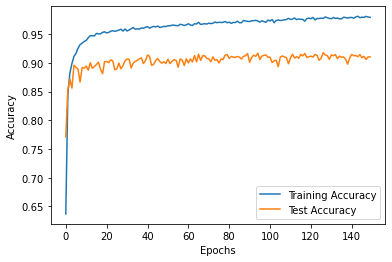

In [114]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [116]:
# Test verileri üzerinde tahminlerin hesaplanması
y_pred = model.predict(x_test_copy_2)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix'in hesaplanması
conf_matrix = confusion_matrix(y_test, y_pred_classes)
print(conf_matrix)

93/93 [==============================] - 0s 2ms/step
[[487   7   2   0   0   0]
 [ 53 412   6   0   0   0]
 [  7  12 401   0   0   0]
 [  0   1   0 400  90   0]
 [  0   0   0  72 459   0]
 [  0   0   0   0  14 523]]


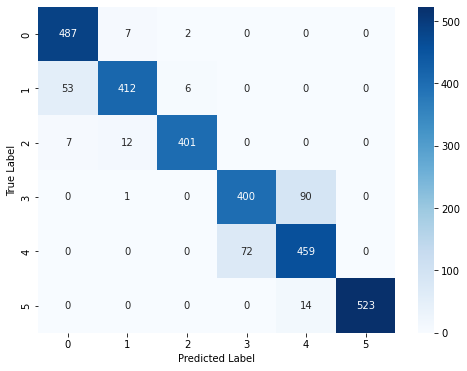

In [117]:
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [118]:
class_report = classification_report(y_test, y_pred_classes)
print(class_report)

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       496
           1       0.95      0.87      0.91       471
           2       0.98      0.95      0.97       420
           3       0.85      0.81      0.83       491
           4       0.82      0.86      0.84       531
           5       1.00      0.97      0.99       537

    accuracy                           0.91      2946
   macro avg       0.91      0.91      0.91      2946
weighted avg       0.91      0.91      0.91      2946

